In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

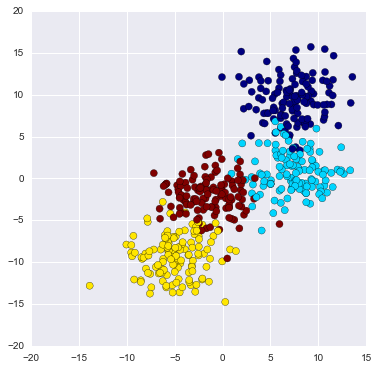

In [3]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='jet')

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
def visualize_tree(classifier, X, Y, boundaries=True,xlim=None, ylim=None):
    
    classifier.fit(X, Y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):

        if i < 0:
            return

        tree = classifier.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

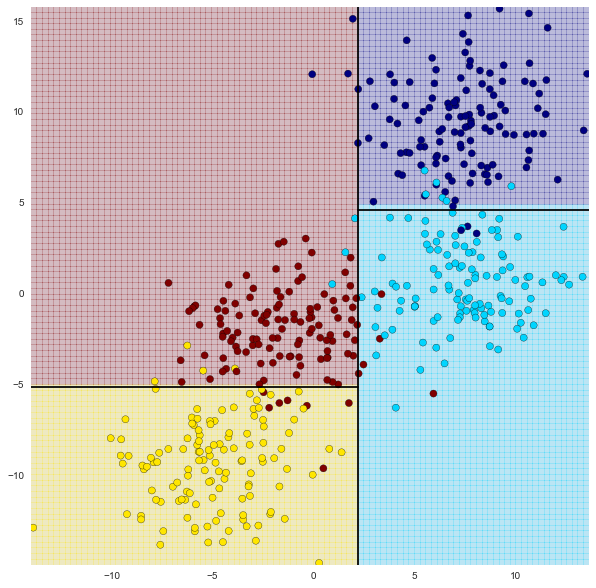

In [13]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

visualize_tree(clf,X,Y)

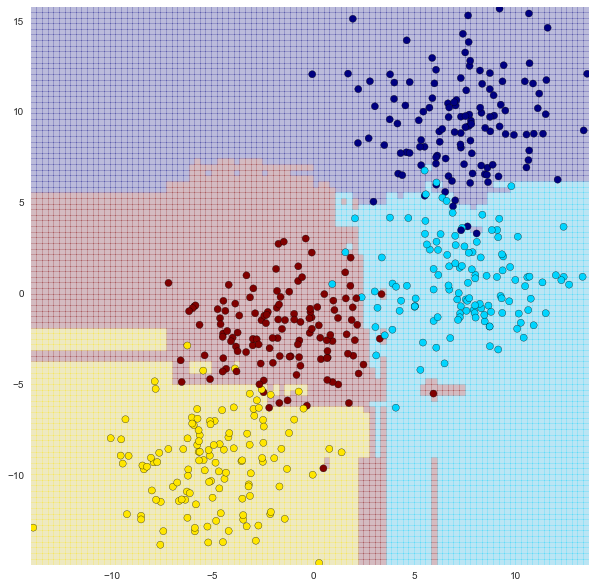

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

visualize_tree(clf,X,Y,boundaries=False)

In [15]:
x = 10 * np.random.rand(100)

In [16]:
x

array([ 4.91389269,  1.35116983,  7.26401861,  5.22306568,  4.0619035 ,
        4.3831554 ,  9.70072817,  6.37305738,  2.24063217,  6.03596485,
        5.93565464,  0.04646592,  9.25755527,  7.92959766,  8.92678344,
        3.5744696 ,  3.64748715,  0.94432405,  2.51082316,  0.56587337,
        1.78745959,  0.11719557,  5.67845876,  5.57538217,  0.25121248,
        8.96096199,  4.63552156,  8.10302346,  9.75722241,  1.38486637,
        9.3873273 ,  5.10677713,  2.07034225,  7.90306629,  1.99651417,
        6.6254857 ,  3.04750552,  3.93233059,  5.70242436,  7.50502575,
        1.06955641,  3.25067047,  3.12503507,  9.39425135,  8.45804075,
        1.83145191,  3.63937206,  4.35462643,  0.37524615,  3.73540613,
        0.57126036,  2.49822908,  9.03352267,  7.04514485,  8.96978248,
        2.88794957,  0.46491295,  3.15727525,  8.91855867,  6.94884225,
        1.09534478,  3.27697281,  4.18721361,  3.92483693,  1.99640366,
        5.82727815,  5.94093201,  6.56407195,  2.90708821,  4.62

In [17]:
def sin_model(x,sigma=0.2):
    noise = sigma * np.random.rand(len(x))
    return np.sin(5*x) + np.sin(0.5 * x) + noise

In [18]:
y = sin_model(x)

<Container object of 3 artists>

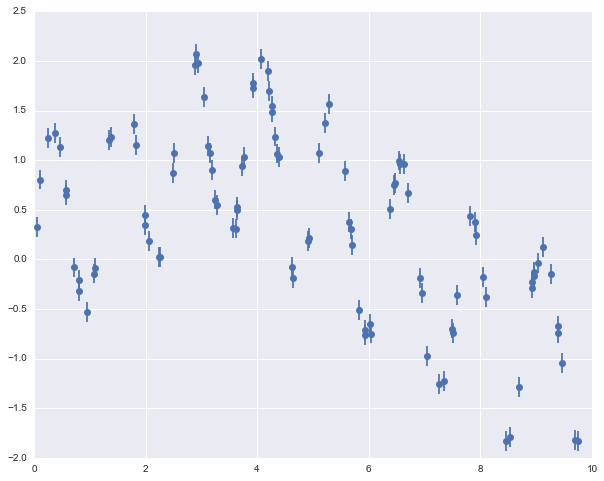

In [19]:
plt.figure(figsize=(10,8))
plt.errorbar(x,y,0.1,fmt='o')

In [20]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)

In [22]:
rfr = RandomForestRegressor(100)

rfr.fit(x[:,None],y)

yfit = rfr.predict(xfit[:,None])
          

In [23]:
ytrue = sin_model(xfit,0)

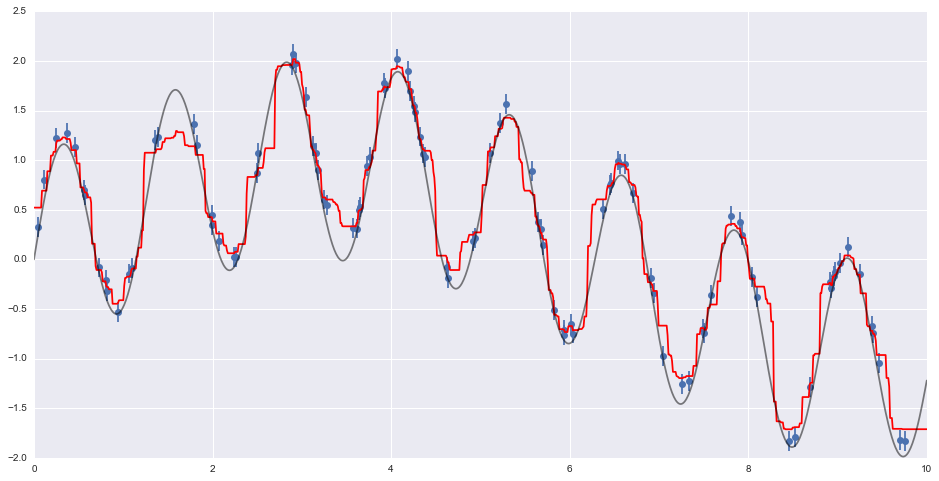

In [26]:
plt.figure(figsize=(16,8))
plt.errorbar(x,y,0.1,fmt='o')
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k',alpha=0.5)